# Laborator 2: Segmentare pe histograma - praguri automate

## Scopul lucrarii
Scopul acestei lucrari este familiarizarea cu tehnicile fundamentale de segmentare automata pe histograma a imaginilor si etichetarea imaginii segmentate.

# 1. Determinarea automata a pragului de segmentare [Otsu]
In cazul binarizarii, problema de segmentare poate fi reformulata in sensul cuantizarii: dorim cuantizarea optimala a valorilor pixelilor imaginii cu $K=2$ niveluri, ceea ce revine la determinarea pragului $T$ astfel incat prin impartirea gamei de niveluri de gri disponibile $[0,L-1]$ in doua subintervale, $[0,T]$ si $[T, L-1]$, si prin
aproximarea fiecarui pixel dintr-un subinterval cu media acestuia, eroarea patratica medie sa fie minima. Astfel, pragul $T$ cu care facem binarizarea trebuie sa minimizeze expresia:
$\varepsilon=P_{0}\sigma_{0}^{2}+P_{1}\sigma_{1}^{2}$
unde $P_{0}$ si $P_{1}$ sunt probabilitatile ca nivelul de gri al unui pixel sa apartina intervalelor $[0,T-1]$, respectiv
$[T,L-1]$:
$P_0=\sum\limits_{i=0}^{T-1}h(i)$,

$P_1=\sum\limits_{i=T}^{L-1}h(i)=1-P_0$,

iar $\sigma_{0}^{2}$ si $\sigma_{1}^{2}$ sunt variantele nivelurilor de gri corespunzatoare acelorasi intervale:
$\sigma_0^2=\frac{\sum\limits_{i=0}^{T-1}i^2h(i)}{\sum\limits_{i=0}^{T-1}h(i)}-\left(\frac{\sum\limits_{i=0}^{T-1}ih(i)}{\sum\limits_{i=0}^{T-1}h(i)}\right)^2,$

$\sigma_1^2=\frac{\sum\limits_{i=T}^{L-1}i^2h(i)}{\sum\limits_{i=T}^{L-1}h(i)}-\left(\frac{\sum\limits_{i=T}^{L-1}ih(i)}{\sum\limits_{i=T}^{L-1}h(i)}\right)^2.$

Pragul cautat $T$ este media aritmetica a mediilor statistice ale valorilor de cuantizat din cele doua intervale de cuantizare alese (notate cu $\mu_0$ si $\mu_1$); tinand seama ca nivelurile de gri din imagine sunt (deja) valori discrete, expresia pragului $T$ se poate scrie ca:
$T=\frac{1}{2}\left(\underset{\mu_0}{\underbrace{\frac{\sum\limits_{i=0}^{T-1}ih(i)}{\sum\limits_{i=0}^{T-1}h(i)}}}+
  \underset{\mu_1}{\underbrace{\frac{\sum\limits_{i=T}^{L-1}ih(i)}{\sum\limits_{i=T}^{L-1}h(i)}}}\right).$

Aceasta ecuatie nu se poate rezolva analitic. Putem gasi totusi valoarea $T$ cautata, care minimizeaza expresia calculand valorile unei forme modificate ale functiei pentru toate valorile posibile ale lui $T \in \{0,1,\ldots,L-1\}$. Pentru aceasta putem rescrie expresia ca:
$\varepsilon=\sum\limits_{i=0}^{L-1}i^{2}h(i) - \left( P_{0}\mu_{0}^{2}+P_1\mu_{1}^{2}\right).$
Minimizarea expresiei anterioare revine la maximizarea lui
$P_{0}\mu_{0}^{2}+P_{1}\mu_{1}^{2}$.

## Ce vom coda:
Plecand de la histograma imaginii, vom coda gasirea pragului de segmentare prin maximizarea ultimei expresii teoretice

In [1]:
import numpy as np
def prag_Otsu(h):
    L=256
    eps=0.0000000000001
    criteriu=np.zeros(256)
    for T in range (0,L):
        P0=0
        mu0=0
        for i in range(0,T):
            P0+=h[i]
            mu0+=i*h[i]
        mu0=mu0/(P0+eps)
    
        P1=0
        mu1=0
        for i in range(T,L):
            P1+=h[i]
            mu1+=i*h[i]
        mu1=mu1/(P1+eps)
        criteriu[T]=P0*mu0*mu0+P1*mu1*mu1
        
    plt.figure(),plt.plot(criteriu),plt.show()
    THR = np.argmax(criteriu)
    return THR

Apoi folosim calculul automat de prag: codam incarcarea imaginii, calculul de histograma, calculul pragului, afisarea imaginii segmentate

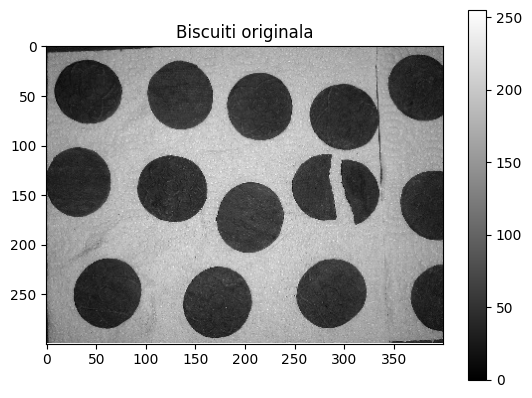

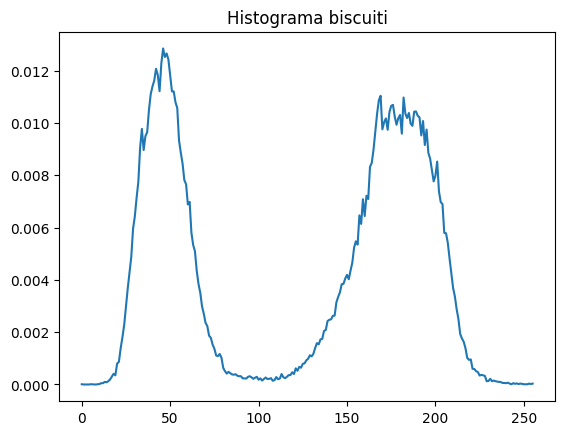

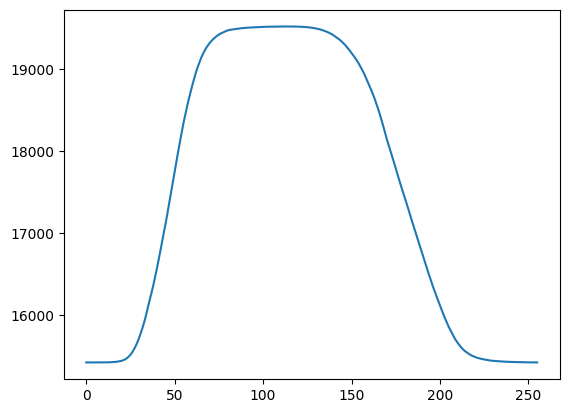

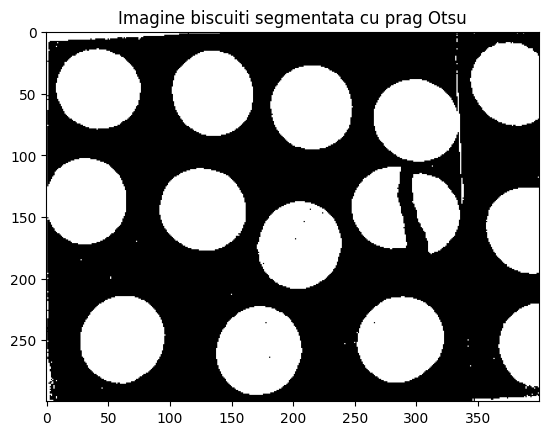

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Imagine biscuiti segmentata cu prag Otsu'),
 None)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color,measure


img2= io.imread('biscuiti.jpg')
h2,w2=np.shape(img2)
plt.figure(),plt.imshow(img2,cmap="gray"),plt.title("Biscuiti originala"),plt.colorbar(),plt.show()

#####histograma
def histograma(h,w,img):
    hist=np.zeros(256)
    for i in range(h):
        for j in range(w):
            hist[img[i,j]]+=1    
    return hist/(h*w)

h=histograma(h2,w2,img2)
plt.figure(),plt.plot(h),plt.title("Histograma biscuiti"),plt.show()


prag = prag_Otsu(h)
SEGM=(img2<=prag)    #in ex nostru cu biscuiti avem mai mult fundal alb deci folosim <= sa facem fundalul negru si biscuitii albi
SEGM=np.uint8(SEGM)
plt.figure(),plt.imshow(SEGM,cmap='gray'),plt.title("Imagine biscuiti segmentata cu prag Otsu"),plt.show()



## Imagini disponibile
biscuiti.jpg; pills.jpg; lena_gray.jpeg; boabe-piper.jpg; layers-b-52.jpg; layers-irish-flag.jpg; layers-bob-marley.png

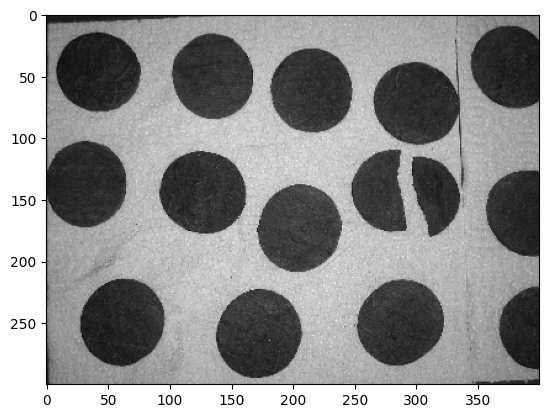

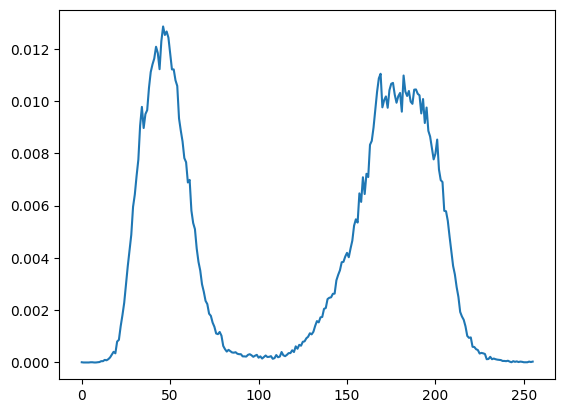

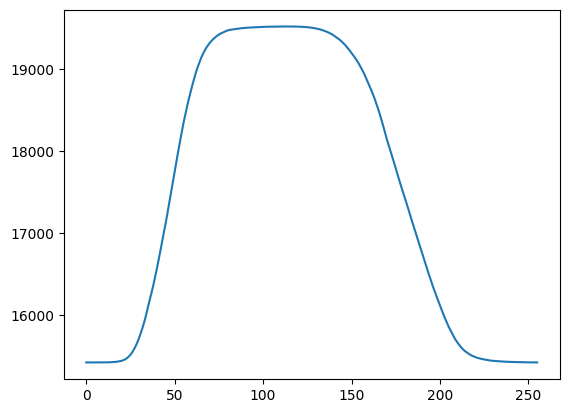

113


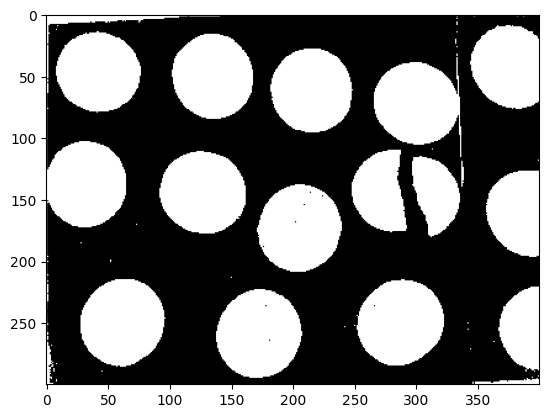

(<Figure size 640x480 with 1 Axes>,
 None)

In [3]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img=io.imread('biscuiti.jpg')
dims=np.shape(img)
H=dims[0]
W=dims[1]

Y=img[0:H,0:W]

h,_=np.histogram(Y,bins=256,range=(0,256),density=True)

plt.figure(),plt.imshow(Y,cmap='gray'),plt.show()
plt.figure(),plt.plot(h),plt.show()

THR = prag_Otsu(h)
print(THR)
plt.figure(),plt.imshow(np.uint8(Y<=THR),cmap='gray'),plt.show()

# 2. Determinarea automata a pragului de segmentare [Riddler]
Pragul Riddler de binarizare este definit ca media aritmetica a valorilor medii a nivelurilor de gri situate de o parte si de alta a pragului. Evident, aceasta definitie nu produce o expresie analitica pentru prag, obtinerea acestuia fiind realizata prin iterarea calculului mediilor si respectiv a pragului, pana la stabilizare.

$\mu_0 = \frac{\sum\limits_{i=0}^{T-1} ih(i)} {\sum\limits_{i=0}^{T-1} h(i)}\\$

$\mu_1 = \frac{\sum\limits_{i=T}^{L-1} ih(i)} {\sum\limits_{i=T}^{L-1} h(i)}\\$

$T=\frac{\mu_0 + \mu_1}{2}$

Evident, totul va incepe cu o initializare a pragului.

## Ce vom coda:
Plecand de la histograma imaginii, vom coda ciclul iterativ care rezolva ecuatiile cuplate prag-medii

In [4]:
def prag_Riddler(Tcalc,H):
    L=256
    eps=0.0000000000001
    T=0
    while T!=Tcalc:
        T=Tcalc
        N1=0
        N2=0

        for i in range (T):
            N1=N1+i*H[i]
            N2=N2+H[i]
        miu0=N1/(N2+eps)
        
        N1=0
        N2=0
        for j in range (T,L):
            N1=N1+j*H[j]
            N2=N2+H[j]
        miu1=N1/(N2+eps)
        Tcalc=np.uint8((miu0+miu1)/2)
    return Tcalc
    
    

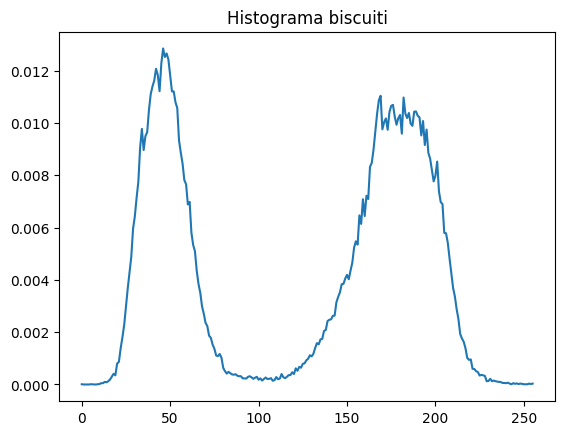

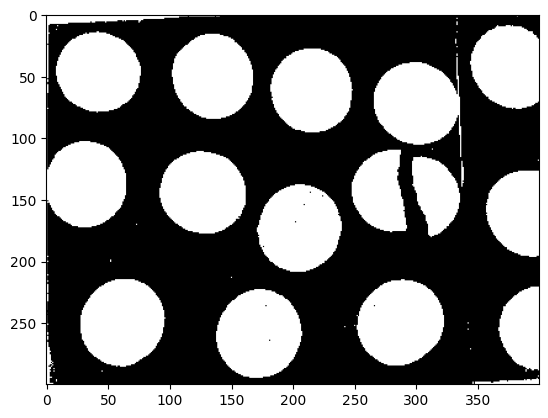

(<Figure size 640x480 with 1 Axes>,
 None)

In [5]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img=io.imread('biscuiti.jpg')
dims=np.shape(img)
H=dims[0]
W=dims[1]

h=histograma(H,W,img)
plt.figure(),plt.plot(h),plt.title("Histograma biscuiti"),plt.show()

Tcalc=prag_Riddler(128,h)
SEGM=(img2<=Tcalc)    #in ex nostru cu biscuiti avem mai mult fundal alb deci folosim <= sa facem fundalul negru si biscuitii albi
plt.figure(),plt.imshow(SEGM,cmap="gray"),plt.show()



# 3. Histograma ca mixtura de gaussiene [sinteza]
O mixtura de distributii este o combinatie liniara (ponderata) convexa a unor functii de densitate de probabilitate.
Cazul cel mai des folosit este acela al unei mixturi de distributii gaussiene.
$N(\mu _{k},\sigma _{k})(x)=\frac{1}{\sigma _{k}\sqrt{2\pi }}e^{-\frac{(x-\mu
_{k})^{2}}{2\sigma _{k}^{2}}}$

Daca histograma $h$ a imaginii este compusa prin superpozitia aditiva a $K$ moduri gaussiene $N(\mu _{k},\sigma _{k})$ , atunci:$ h(x)=\sum\limits_{k=1}^{K}w_{k}N(\mu _{k},\sigma _{k})(x)$, cu
$\sum\limits_{k=1}^{K}w_{k}=1$

## Ce vom coda
O functie care calculeaza valorile functiei de densitate de probabilitatea de tip gaussian peste intervalul de niveluri de gri $[0,L-1]$ pe baza mediei, variantei si probabilitatii de aparitie a acestei functii. Se vor putea calcula mai multe gaussiene simultan

Vom folosi apoi functia de descompunere EM a unei histograme in moduri gaussiene.

## Imagini disponibile
biscuiti.jpg; pills.jpg; lena_gray.jpeg; boabe-piper.jpg; layers-b-52.jpg; layers-irish-flag.jpg; layers-bob-marley.png

In [6]:
# functie care genereaza valorile unei/unor distributii gaussiene pentru care se dau medie, varianta, probabilitate apriori
def my_gaussian(m,v,prob):
    K=np.size(m)
    prob=prob/np.sum(prob)
    pdf=np.zeros([256,K])
    coef=prob/(np.sqrt(2*PI*v))
    for i in range(0,256):
        pdf[i,:]=coef*np.exp(-(i-m)*(i-m)/(2*v))
    hmixt = np.sum(pdf,axis=1)
    hmixt=hmixt/sum(hmixt)
    return hmixt, pdf
# functia care face descompunerea unei histograme in moduri gaussiene
def my_EM(hist,K):
    p=np.ones(K)/K
    mu=L*np.array(range(1,K+1))/(K+1);
    v= L*np.ones(K)
    while(1):
        hmixt,prb = my_gaussian(mu,v,p);
        scal = np.sum(prb,axis=1)+eps;
        loglik=np.sum(hist*np.log(scal));
        for i in range(0,K):
            pp=hist*prb[:,i]/scal
            p[i]=np.sum(pp)
            mu[i]=np.sum(np.array(range(0,L))*pp)/p[i]
            vr=np.array(range(0,L))-mu[i]
            v[i]=np.sum(vr*vr*pp)/p[i]
        p=p/np.sum(p)

        hmixt,prb = my_gaussian(mu,v,p);
        scal = np.sum(prb,axis=1)+eps;
        nloglik=np.sum(hist*np.log(scal));
        if((nloglik-loglik)<0.0001):
            break
    #gata while
    return mu, v, p

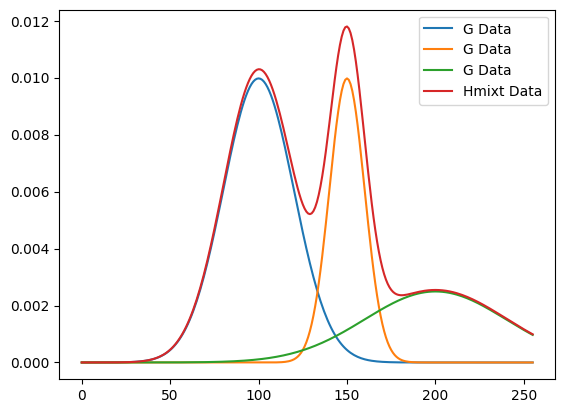

[134.62576417]
[1987.9539437]
[1.]


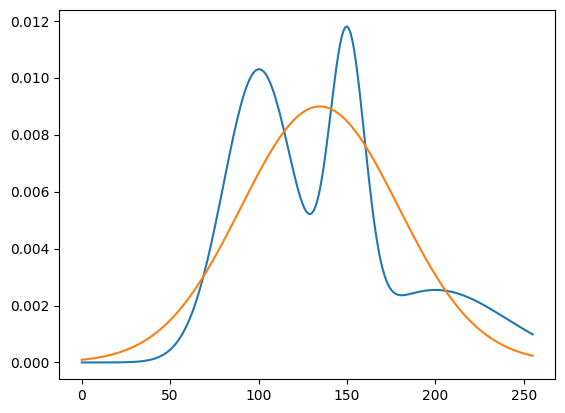

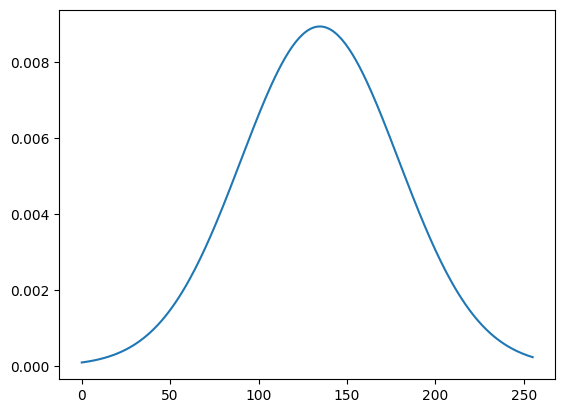

(<Figure size 640x480 with 1 Axes>,
 None)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
PI = 3.1415
eps = 0.00000001
L=256

# de aici putem genera mixturile:
# exemplu: 2 gaussiene, prima cu media 100, varianta 400, acopera 25%, a doua cu media 200, varianta 1600, acopera 75%
medii=np.array([100,150,200])
variante=np.array([400,100,1600])
probabilitati=np.array([0.5,0.25,0.25])
hmixt, g = my_gaussian(medii, variante, probabilitati)
plt.figure(),plt.plot(g, label='G Data'),plt.plot(hmixt, label='Hmixt Data'),plt.legend(),plt.show()
#plt.figure(),plt.plot(g),plt.plot(hmixt),plt.show()

# aici se ia histo care este o histograma de sinteza sau histograma unei imagini
# si se descompune cu EM
m1, v1, p1 = my_EM(hmixt,1)
print(m1)
print(v1)
print(p1)
histo1, g1 = my_gaussian(m1, v1, p1)
plt.figure(),plt.plot(hmixt),plt.plot(histo1),plt.show()
plt.figure(),plt.plot(g1),plt.show()


In [8]:
Testati descompunerea pe moduri gaussiene pentru histograma unei imagini

SyntaxError: invalid syntax (1385945566.py, line 1)

[124.20118261]
[4431.04642863]
[1.]


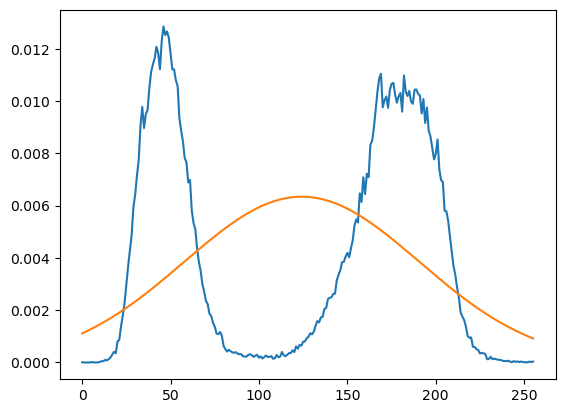

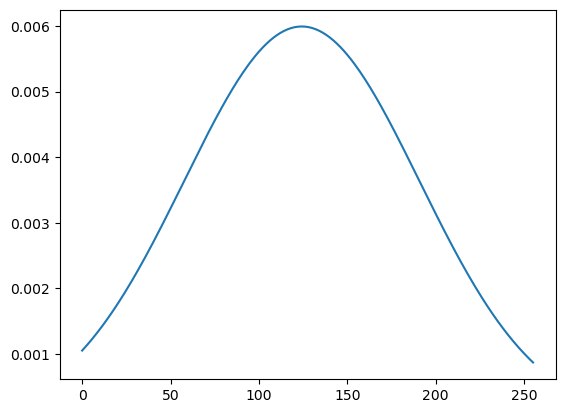

(<Figure size 640x480 with 1 Axes>,
 None)

In [10]:
m2, v2, p2 = my_EM(h,1)
print(m2)
print(v2)
print(p2)
histo1, g2 = my_gaussian(m2, v2, p2)
plt.figure(),plt.plot(h),plt.plot(histo1),plt.show()
plt.figure(),plt.plot(g2),plt.show()

# 4. Segmentarea cu prag optim

In ipoteza de moduri gaussiene (normale) cu parametri cunoscuti, pragul optim de segmentare pentru binarizare este obtinut
prin rezolvarea ecuatiei:
$ a \times T^2 + b \times T + c = 0$, unde

$a=\left(\frac{1}{\sigma_{1}^{2}}-\frac{1}{\sigma_{0}^{2}} \right)$

$b=-2\left( \frac{\mu_1}{\sigma_{1}^{2}}-\frac{\mu_0}{\sigma_{0}^{2}} \right)$

$c=\ln \left( \frac{P_0}{P_1} \frac{\sigma_1}{\sigma_0}\right) + \left( \frac{\mu_{1}^{2}}{\sigma_{1}^{2}}-\frac{\mu_{0}^{2}}{\sigma_{0}^{2}} \right)$

Daca varianta (dispersia) modurilor gaussiene ce caracterizeaza tipurile de obiecte sunt egale, atunci solutia pentru pragul optim se reduce la:
$T_{opt} = \frac{\mu_1 +\mu_0}{2} + \frac{\sigma^2}{\mu_1 - \mu_0} \ln \frac{P_0}{P_1}$

## Tema:
Codati si verificati modul de functionare al segmentarii cu prag optim

In [11]:
def  segm_prag_optim(v1,v2,m1,m2,p1,p2):
    a=(1/v2)-(1/v1)
    b=(-2)*((m2/v2)-(m1/v1))
    c=np.log((p1*m2)/(p2*m1))+((m2**2/v2)-(m1**2/v1))
    delta=b**2-4*a*c
    Topt1=(-b+np.sqrt(delta))/(2*a)
    Topt2=(-b-np.sqrt(delta))/(2*a)
    
    return Topt1,Topt2

(201.35860715989608, 131.97472617343726)


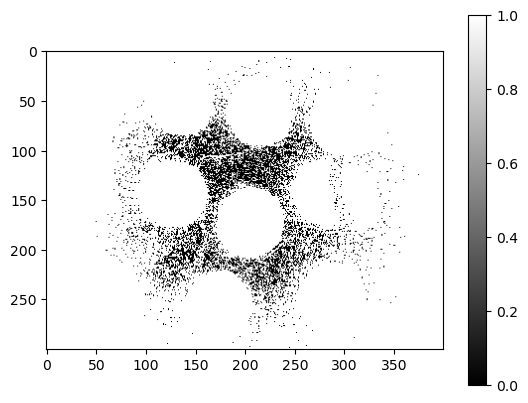

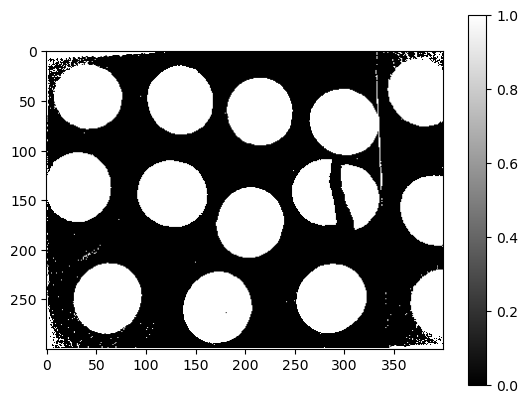

(<Figure size 640x480 with 2 Axes>,
 None)

In [12]:
varianta_g1=400
varianta_g2=100
miu_g1=100
miu_g2=150
p_g1=0.25
p_g2=0.75

Topt=np.array([])
Topt=segm_prag_optim(varianta_g1,varianta_g2,miu_g1,miu_g2,p_g1,p_g2)
print(Topt)
segm_opt1=(img2<=Topt[0])    #in ex nostru cu biscuiti avem mai mult fundal alb deci folosim <= sa facem fundalul negru si biscuitii albi
plt.figure(),plt.imshow(segm_opt1,cmap="gray"),plt.colorbar(),plt.show()

segm_opt2=(img2<=Topt[1])    #in ex nostru cu biscuiti avem mai mult fundal alb deci folosim <= sa facem fundalul negru si biscuitii albi
plt.figure(),plt.imshow(segm_opt2,cmap="gray"),plt.colorbar(),plt.show()


Separabilitatea modurilor inseamna verificarea de catre modurile vecine spatial dintr-o mixtura a unei serii de conditii, ce garanteaza ca modurile sunt discernabile din perspectiva segmentarii. Un asemenea set de conditii a fost introdus de exemplu de Nakagawa:

$\mu _{2}-\mu _{1}>4$

$0.1<\frac{\sigma _{2}}{\sigma _{1}}<10 $

$\min\limits_{x\in [\mu _{1};\mu _{2}]}h(x)<0.8\cdot \min \left( h(\mu_{1}),h(\mu _{2})\right)$

## Tema:
Verificati separabilitatea unor moduri invecinate conform cerintelor Nakagawa

In [13]:

def my_gaussian(m,v,prob):  #medie -> m, varianta -> v, probabilitate -> prob
    K=np.size(m)
    prob=prob/np.sum(prob)
    pdf=np.zeros([256,K])
    coef=prob/(np.sqrt(2*PI*v))
    for i in range(0,256):
        pdf[i,:]=coef*np.exp(-(i-m)*(i-m)/(2*v))
    hmixt = np.sum(pdf,axis=1)
    hmixt=hmixt/sum(hmixt)
    return hmixt, pdf

def Nakagawa(hmixt,medii,dispersii):
    cond=True
    k=len(medii)
    for i in range (0,k-1):
        if medii[i+1]-medii[i]<=4:
            cond=False
        if (0.1>=(dispersii[i+1]/dispersii[i])) or (10<=(dispersii[i+1]/dispersii[i])):
            cond=False
        if np.min(hmixt[medii[i]:medii[i+1]])>0.8*min(hmixt[medii[i]],hmixt[medii[i+1]]):
            cond=False  
        if cond==True:
            print("Sunt separabile:",i,i+1)
        else:
            print("Nu sunt separabile:",i,i+1)

In [14]:

# exemplu: 3 gaussiene, prima cu media 100, varianta 400, acopera 50%, a doua cu media 150, varianta 100, acopera 25%, a treia cu media 200, varianta 1600, acopera 25%
medii=np.array([100,150,200])
variante=np.array([400,100,1600])
dispersii=np.sqrt(variante)
probabilitati=np.array([0.5,0.25,0.25])
hmixt, g = my_gaussian(medii, variante, probabilitati)

Nakagawa(hmixt,medii,dispersii) 

Sunt separabile: 0 1
Nu sunt separabile: 1 2


# 5. Etichetarea imaginilor binare
Imaginile binare sunt definite de doar doua valori posibile pe care le pot lua punctele acestora: 0 si 1. In mod conventional se considera ca valoarea 1 corespunde punctelor-obiect (puncte de interes) din imagine, in timp ce valoarea 0 defineste punctele fundalului (sau fondului imaginii). Etichetarea imaginilor binare are ca obiectiv identificarea si separarea obiectelor individuale din imagine, deci marcarea tuturor punctelor ce apartin unui anumit obiect cu o eticheta unica, diferita de etichetele celorlalte obiecte prezente. Fiecare obiect individual este o componenta conexa distincta.

Esenta algoritmilor de etichetare (segmentare in suportul imaginii) este identificarea pixelilor ce formeaza un acelasi obiect prin detectia adiacentelor dintre acestia si asocierea unei etichete unice tuturor punctelor aceluiasi obiect.
Adiacenta (vecinatatea) este deci conceptul fundamental pe baza caruia sunt identificate obiectele. Adiacenta este determinata de tipul de conexitate adoptat; in cazul imaginilor esantionate pe o retea patrata sunt uzuale modelele de
conexitate de tip $V_{4}$ sau de tip $V_{8}$. Pentru o conexitate de tip $V_{4}$ fiecare pixel al
imaginii are patru vecini (ce formeaza ceea ce se numeste vecinatatea imediata a punctului). Vecinatatea imediata a punctului de coordonate $(l,c)$ este multimea $V_{4}(l,c)=\left\{(l-1,c),(l+1,c),(l,c-1),(l,c+1)\right\}$. Pentru o conexitate de tip $V_{8}$ fiecare pixel al imaginii are opt vecini (ce formeaza ceea ce se numeste vecinatatea extinsa a punctului). Vecinatatea extinsa a punctului de coordonate $(l,c)$ este multimea $V_{8}(l,c)=V_{4}(l,c)\bigcup
\left\{(l-1,c-1),(l+1,c-1),(l-1,c+1),(l+1,c+1)\right\}$ 

Un drum intre doua puncte ale imaginii este o secventa ordonata de puncte ale imaginii, vecine doua cate doua (relativ la un anumit tip de conexitate, $V_{4}$ sau $V_{8}$ ), care are drept capete punctele considerate. Un obiect este o componenta conexa, iar pentru o componenta conexa, intre orice doua puncte ce ii apartin exista cel putin un drum inclus in componenta respectiva.

## Ce vom coda
incarcare imagine de test, thresholding pentru binarizare, utilizarea functiei label din modulul skimage.measure

## Imagini disponibile
biscuiti.jpg; pills.jpg; lena_gray.jpeg; boabe-piper.jpg; layers-b-52.jpg; layers-irish-flag.jpg; layers-bob-marley.png

(300, 400)


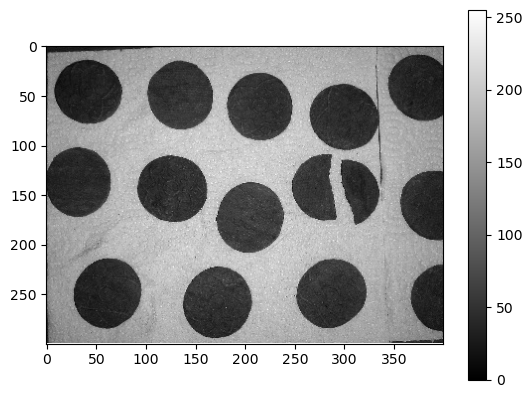

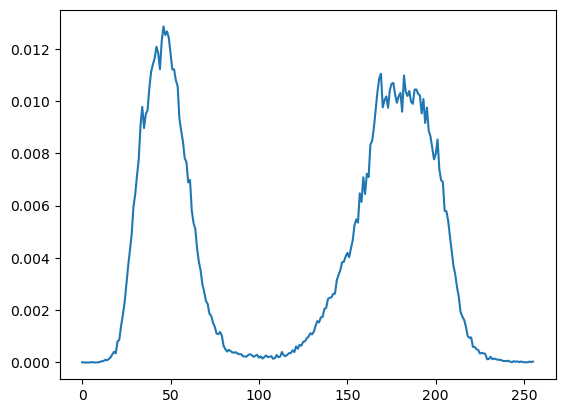

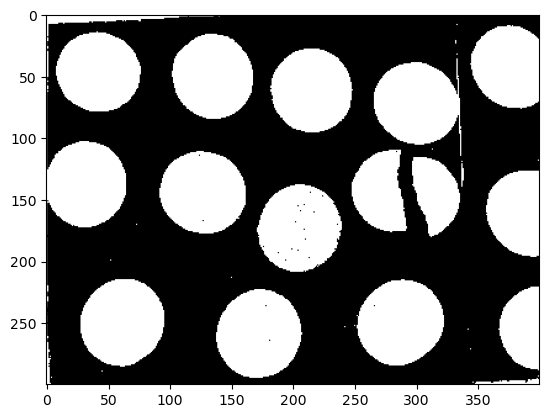

42


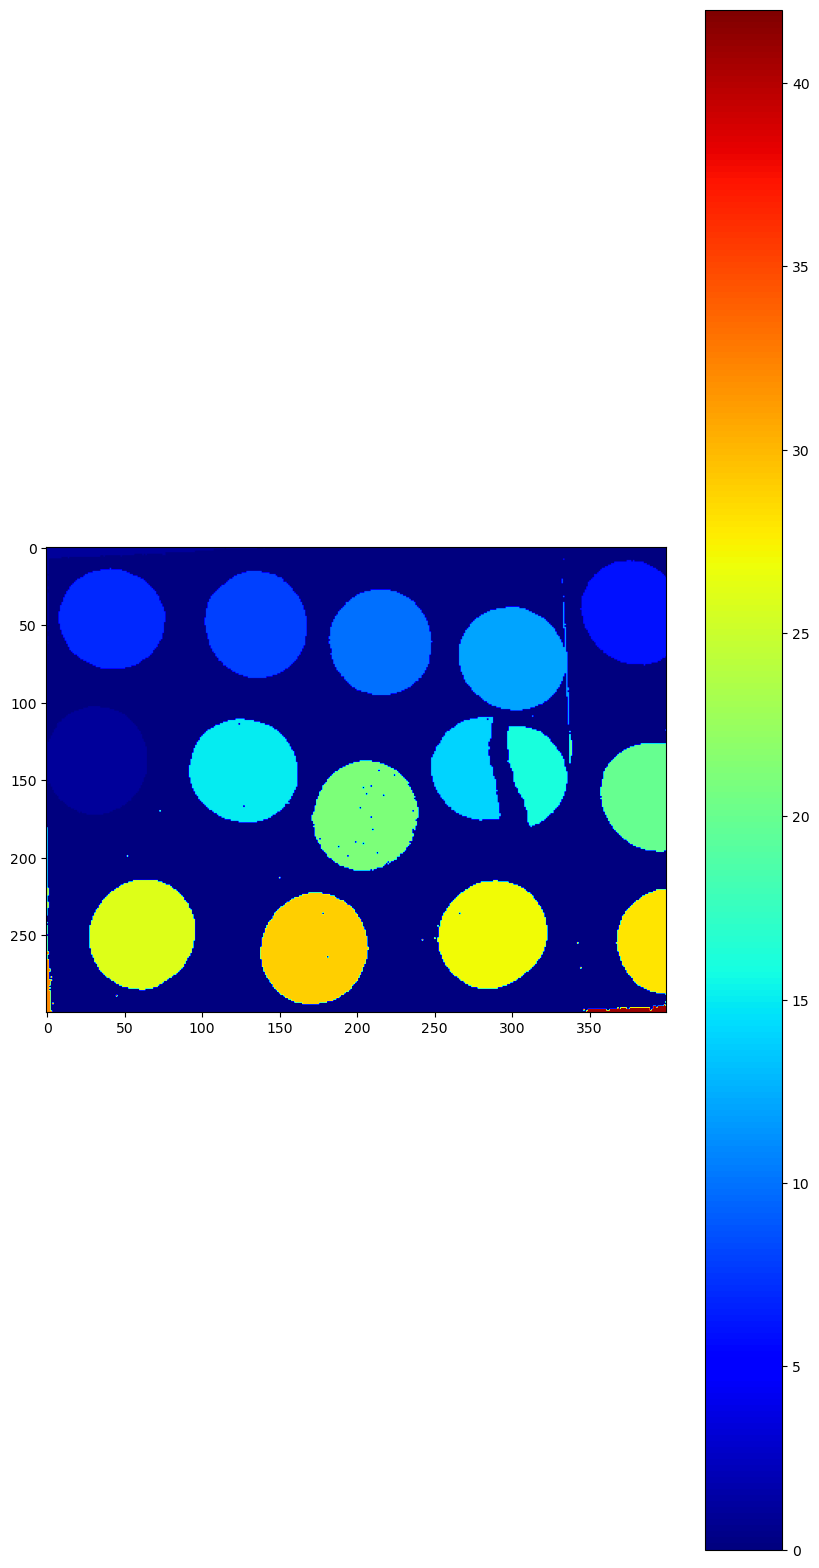

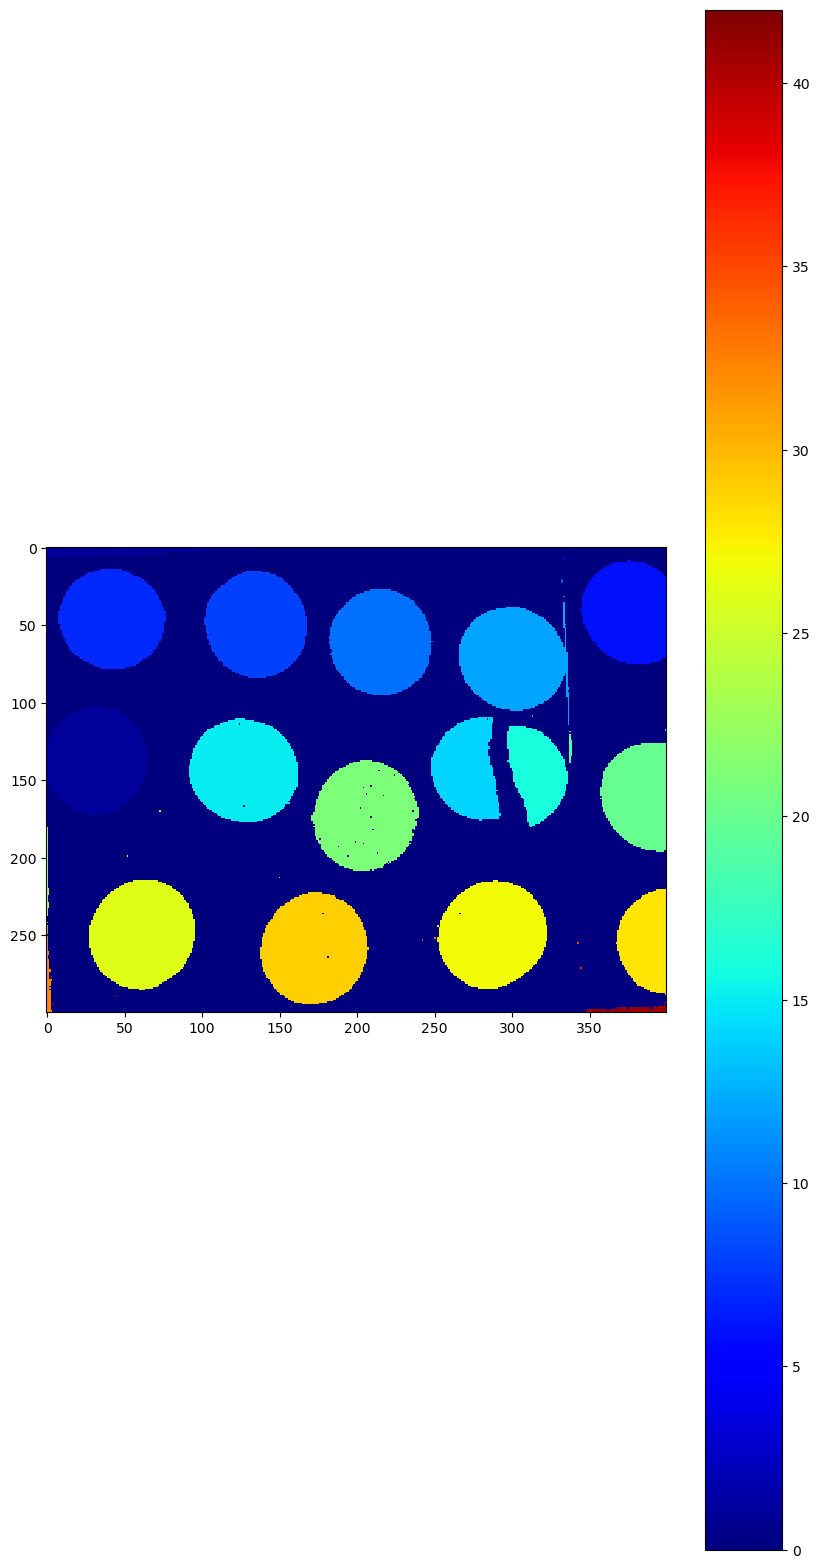

0
42


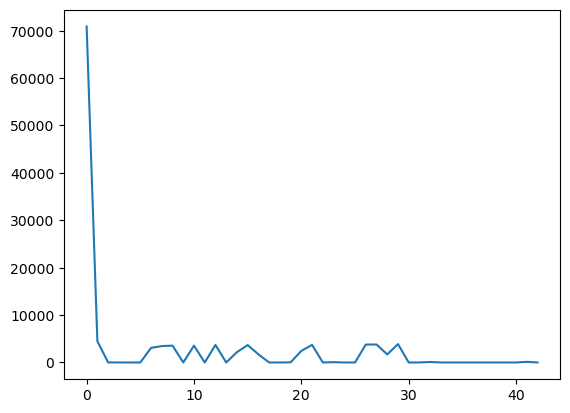

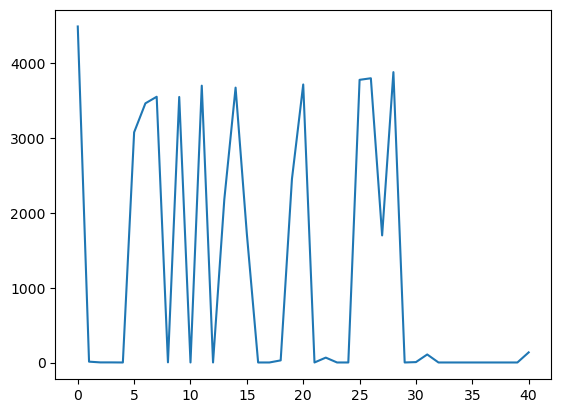

[7.0887e+04 4.4910e+03 1.2000e+01 2.0000e+00 2.0000e+00 1.0000e+00
 3.0770e+03 3.4640e+03 3.5520e+03 3.0000e+00 3.5490e+03 1.0000e+00
 3.7000e+03 1.0000e+00 2.1800e+03 3.6740e+03 1.7180e+03 1.0000e+00
 1.0000e+00 2.9000e+01 2.4530e+03 3.7160e+03 1.0000e+00 6.6000e+01
 1.0000e+00 1.0000e+00 3.7780e+03 3.7990e+03 1.6990e+03 3.8810e+03
 1.0000e+00 6.0000e+00 1.0800e+02 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.3600e+02]


In [17]:
img=io.imread('biscuiti.jpg')
dims=np.shape(img)
print(dims)

H=dims[0]
W=dims[1]
plt.figure(),plt.imshow(img,cmap="gray"),plt.colorbar(),plt.show()

#histograma
h,_=np.histogram(img,bins=256,range=(0,256),density=True)
plt.figure(),plt.plot(h),plt.show()


BW=np.uint8(img<=100)
plt.figure(),plt.imshow(BW,cmap="gray"),plt.show()
# BW=(Y>170)
# plt.figure(),plt.imshow(BW,cmap="gray"),plt.show()


#############etichetarea obiectelor
[LabelImage, nums]=measure.label(BW,return_num='True')
print(nums)
plt.figure(figsize=(10,20)),plt.imshow(LabelImage,cmap="jet"),plt.colorbar(),plt.show()
plt.figure(figsize=(10,20)),plt.imshow(LabelImage,cmap="jet",interpolation='none'),plt.colorbar(),plt.show()

print(np.min(LabelImage))
print(np.max(LabelImage))

hL=np.zeros(nums+1)   #nr de aparitii pentru fiecare element
for i in range (H):
    for j in range (W):
        hL[LabelImage[i,j]]+=1

        
#nr de pixeli pt fiecare eticheta
plt.figure(),plt.plot(hL),plt.show()

#nr de pixeli pt fiecare eticheta fara pixelii pentru fundal
plt.figure(),plt.plot(hL[1:nums]),plt.show()   #incepem de la 1 ca sa excludem fundalul
print(hL[0:nums])   



Fiecare componenta conexa din imaginea binara are dupa etichetare pentru toti pixelii o aceeasi valoare. Atentie la vizualizarea imaginii etichetate la folosirea tabelei de culoare si la afisarea imaginii fara interpolare. Verificarea numarului de componente va arata ca fundalul RAMANE cu eticheta 0 (ca si valorile sale initiale), iar etichetele obiectelor sunt de la 1 la numarul maxim de etichete returnat de functia de etichetare, fara etichete neutilizate. Putem folosi histograma imaginii etichetate pentru a vedea numarul de pixeli pe fiecare eticheta (deci in fiecare obiect).

0
42


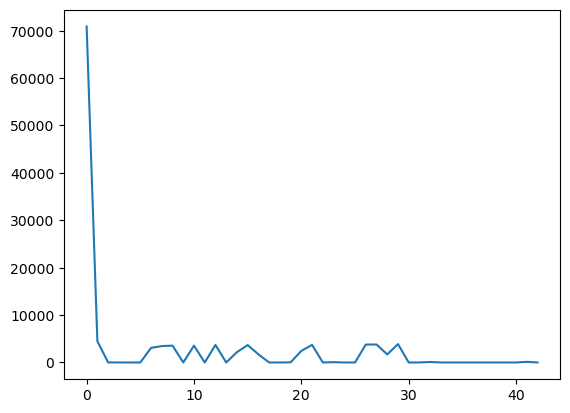

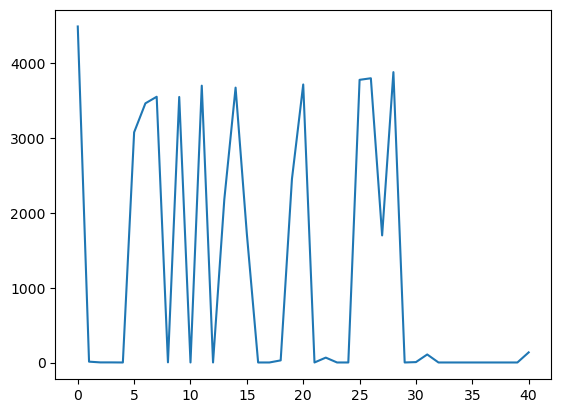

[7.0887e+04 4.4910e+03 1.2000e+01 2.0000e+00 2.0000e+00 1.0000e+00
 3.0770e+03 3.4640e+03 3.5520e+03 3.0000e+00 3.5490e+03 1.0000e+00
 3.7000e+03 1.0000e+00 2.1800e+03 3.6740e+03 1.7180e+03 1.0000e+00
 1.0000e+00 2.9000e+01 2.4530e+03 3.7160e+03 1.0000e+00 6.6000e+01
 1.0000e+00 1.0000e+00 3.7780e+03 3.7990e+03 1.6990e+03 3.8810e+03
 1.0000e+00 6.0000e+00 1.0800e+02 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.3600e+02]


In [19]:
print(np.min(LabelImage))
print(np.max(LabelImage))

hL=np.zeros(nums+1)   #nr de aparitii pentru fiecare element
for i in range (H):
    for j in range (W):
        hL[LabelImage[i,j]]+=1

        
#nr de pixeli pt fiecare eticheta
plt.figure(),plt.plot(hL),plt.show()

#nr de pixeli pt fiecare eticheta fara pixelii pentru fundal
plt.figure(),plt.plot(hL[1:nums]),plt.show()   #incepem de la 1 ca sa excludem fundalul
print(hL[0:nums])   

Extragerea unei unice componente binare inseamna sa extragem din imaginea etichetata doar pixelii a caror eticheta este cea specificata.

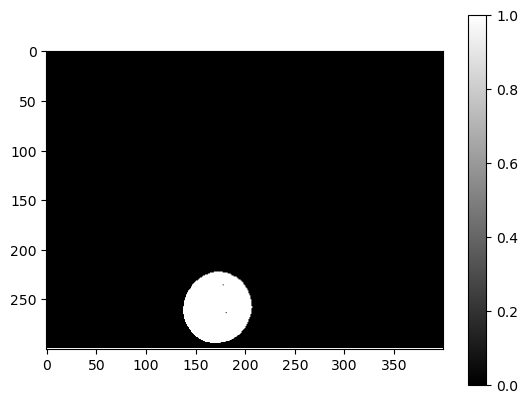

(<Figure size 640x480 with 2 Axes>,
 None)

In [16]:
#############Extragerea unei etichete din imaginea binarizata
componenta_extrasa=15
COMP=(LabelImage==componenta_extrasa)
plt.figure(),plt.imshow(COMP,cmap="gray"),plt.colorbar(),plt.show()

In general imaginea binarizata are multe componente foarte mici, ce pot fi asimilate unui zgomot. E clar ca nu cautam zeci de obiecte, obiectele reale sunt mult mai putine si atunci trebuie filtrata imaginea binara pentru a elimina obiectele mici (parazite). Acest lucru se poate face fie inainte de etichetare (CUM?), fie dupa etichetare (CUM?)

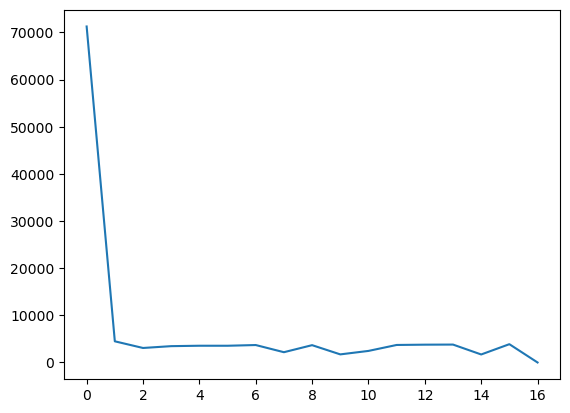

16


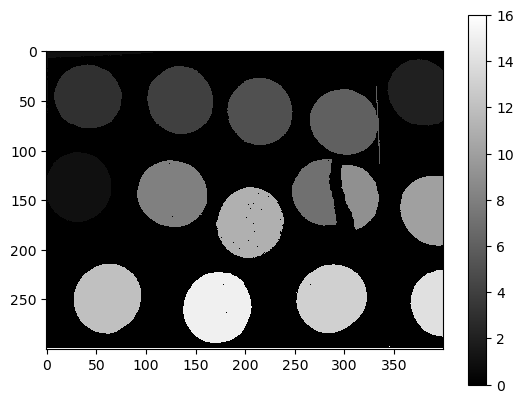

(<Figure size 640x480 with 2 Axes>,
 None)

In [21]:
#############eliminarea elementelor din etichetare care au aparitii putine (ca numar de pixeli)
dims=np.shape(img)
H=dims[0]
W=dims[1]
hL=np.zeros(nums+1)        #numarul de aparitii pentru fiecare element
for i in range (0,H):
    for j in range (0,W):
        hL[LabelImage[i,j]]+=1
plt.figure(),plt.plot(hL),plt.show()
#plt.figure(),plt.plot(hL[1:nums]),plt.show() # in caz ca dorim sa excludem fundalul
for et in range(1,nums):
    if hL[et] <250: 
        mask = (LabelImage != et)      #masca ia valoarea imagine binarizata cu 1 unde nu e obiect de numarul et
        LabelImage = LabelImage*mask   #elimina obiectul de numar et
        
#forul de mai sus elimina toate obiectele cu numar de pixeli mai mici ca 150
LabelImage[LabelImage!=0] = 1              #binarizeaza toate componentele ramase
[LabelImage, nums]=measure.label(LabelImage,return_num='True')      #reface etichetarea pentru imagine rebinarizata
print(nums)                                                #cate elemente a detectat noua etichetare
plt.figure(),plt.imshow(LabelImage,cmap="gray",interpolation='none'),plt.colorbar(),plt.show()           #afisare noua etichetare